In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)

In [9]:
df = pd.read_csv('../data/processed/flights_weather.csv')
df.head()

/var/folders/8l/_qddcffx71x8s26pmmgqthdm0000gq/T/ipykernel_23305/648578119.py:1: DtypeWarning: Columns (7,8,18,21,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/flights_weather.csv')


,Year,Month,Day,DayOfWeek,FlightNumber,AirlineCode,TailNumber,OriginAirport,DestinationAirport,DepartureTime,ArrivalTime,AirTime,Distance,DepartureDelay,ArrivalDelay,Diverted,WeatherDelay,AirlineName,DestinationAirportName,FlightDate,Delayed,Date,Awnd,Prcp,Snow,Tmax,Tmin,AirportCode
0,2015,10,1,4,2582,DL,N993AT,10397,10135,2103.0,2257.0,88.0,692,-3.0,-14.0,0,0.0,Delta Air Lines Inc.,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,10,1,4,4940,EV,N851AS,10397,10135,1024.0,1216.0,92.0,692,-3.0,-14.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,1,4,5969,EV,N11551,13930,10135,1353.0,1658.0,91.0,655,-4.0,6.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,10,1,4,5151,EV,N858AS,11433,10135,1359.0,1521.0,62.0,425,-3.0,-8.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,10,1,4,5197,EV,N849AS,10397,10135,1444.0,1645.0,102.0,692,0.0,-1.0,0,0.0,Atlantic Southeast Airlines,NaN,2015-10-01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop(['Year', 'Month', 'Day', 'DayOfWeek', 'FlightDate'], axis=1).describe()

,FlightNumber,DepartureTime,ArrivalTime,AirTime,Distance,DepartureDelay,ArrivalDelay,Diverted,WeatherDelay,Awnd,Prcp,Snow,Tmax,Tmin
count,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5714008.0,5.714008e+06,3.842061e+06,3.842061e+06,3.842061e+06,3.842061e+06,3.842061e+06
mean,2.164384e+03,1.335066e+03,1.476373e+03,1.135116e+02,8.244569e+02,9.294842e+00,4.407057e+00,0.0,5.425671e-01,8.307327e+00,1.004309e-01,4.414667e-02,7.066978e+01,5.242765e+01
std,1.754706e+03,4.964198e+02,5.259730e+02,7.223082e+01,6.086620e+02,3.688972e+01,3.927130e+01,0.0,8.887775e+00,3.609315e+00,3.148156e-01,3.942573e-01,1.914503e+01,1.830704e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,3.100000e+01,-8.200000e+01,-8.700000e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.700000e+01
25%,7.280000e+02,9.210000e+02,1.058000e+03,6.000000e+01,3.730000e+02,-5.000000e+00,-1.300000e+01,0.0,0.000000e+00,5.820000e+00,0.000000e+00,0.000000e+00,6.000000e+01,4.100000e+01
50%,1.681000e+03,1.330000e+03,1.512000e+03,9.400000e+01,6.500000e+02,-2.000000e+00,-5.000000e+00,0.0,0.000000e+00,7.830000e+00,0.000000e+00,0.000000e+00,7.400000e+01,5.500000e+01
75%,3.211000e+03,1.740000e+03,1.916000e+03,1.440000e+02,1.065000e+03,7.000000e+00,8.000000e+00,0.0,0.000000e+00,1.051000e+01,2.000000e-02,0.000000e+00,8.500000e+01,6.700000e+01
max,9.320000e+03,2.400000e+03,2.400000e+03,6.900000e+02,4.983000e+03,1.988000e+03,1.971000e+03,0.0,1.211000e+03,2.774000e+01,7.100000e+00,2.210000e+01,1.170000e+02,9.300000e+01


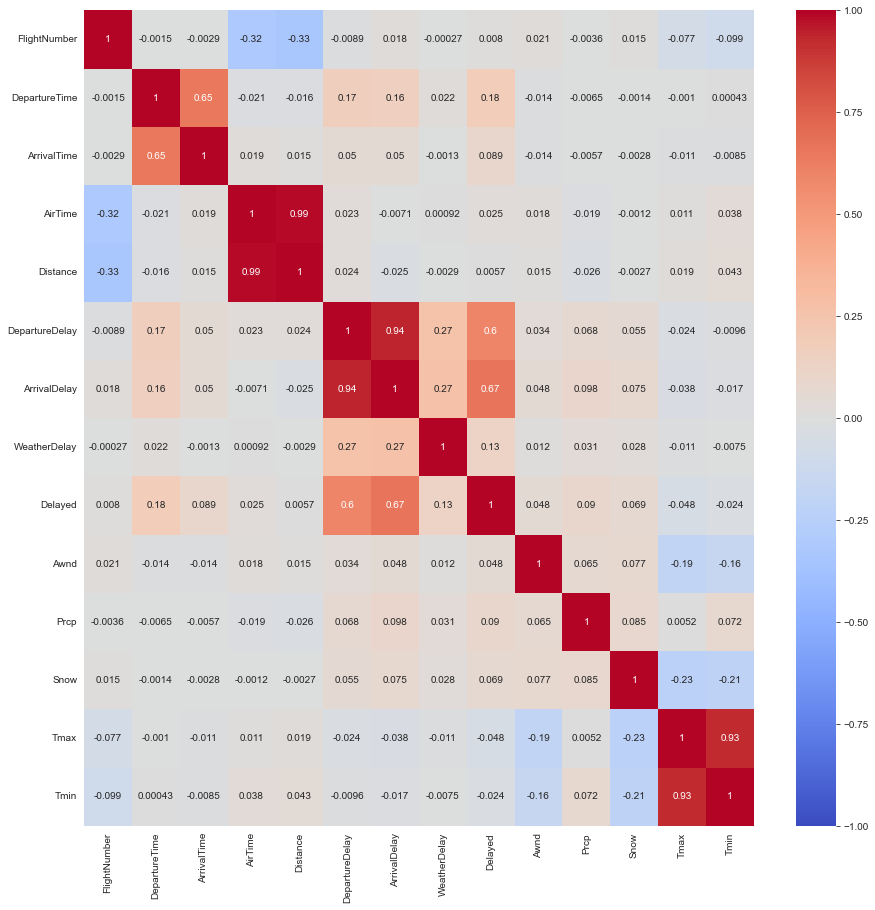

In [15]:
fig = plt.figure(figsize=(15, 15))

sns.heatmap(df[['FlightNumber', 'DepartureTime', 'ArrivalTime', 'AirTime', 'Distance', 
                'DepartureDelay', 'ArrivalDelay', 'WeatherDelay', 'Delayed', 'Awnd', 'Prcp', 'Snow', 'Tmax', 'Tmin']].corr(), 
            vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

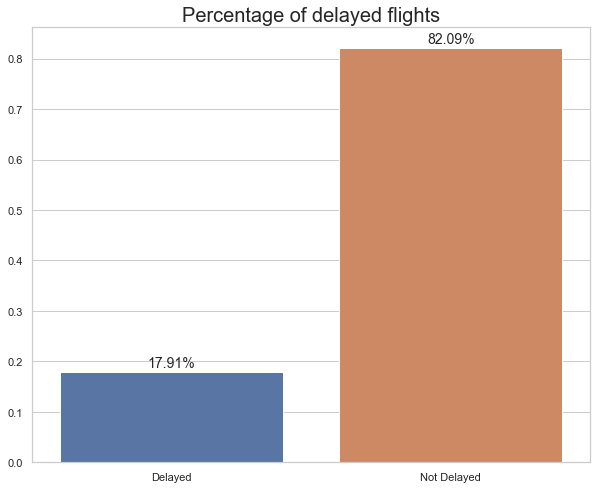

In [98]:
# Delayed percentage
delayed = len(df[df.Delayed == True]) / df.shape[0]
not_delayed = len(df[df.Delayed == False]) / df.shape[0]

# plot
fig = plt.figure(figsize=(10, 8))

sns.barplot(x=['Delayed', 'Not Delayed'], y=[delayed, not_delayed])

plt.title('Percentage of delayed flights', fontsize=20)
plt.annotate(f'{delayed:.2%}', xy=(0, delayed), xytext=(0, delayed + 0.01), ha='center', fontsize=14)
plt.annotate(f'{not_delayed:.2%}', xy=(1, not_delayed), xytext=(1, not_delayed + 0.01), ha='center', fontsize=14)

plt.show()

In [116]:
fig = px.bar(
    df['Delayed'].value_counts(), 
    x=['Not Delayed', 'Delayed'], 
    y='Delayed',
    title='Number of Delayed Flights',
    labels={'Delayed': 'Number of Flights', 'x': ''},
    height=600,
    width=800,
    color=['Not Delayed', 'Delayed'],
    color_discrete_sequence=['rgb(0, 147, 146)', 'rgb(208, 88, 126)'],
    template='plotly_white'
)

# add percentage annotation
fig.add_annotation(
    x=0,
    y=df['Delayed'].value_counts()[0] + 200000,
    text=f"{df['Delayed'].value_counts()[0] / df.shape[0]:.2%}",
    showarrow=False,
    font=dict(
        family='Helvetica',
        size=24,
        color='#272b4f'
    ),
)

fig.add_annotation(
    x=1,
    y=df['Delayed'].value_counts()[1] + 200000,
    text=f"{df['Delayed'].value_counts()[1] / df.shape[0]:.2%}",
    showarrow=False,
    font=dict(
        family='Helvetica',
        size=24,
        color='#272b4f'
    ),
)

        

fig.update_layout(
    title=dict(
        text = '<b>Number of Delayed Flights</b>',
        x=0.085,
        y=0.95,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
)

fig.show()

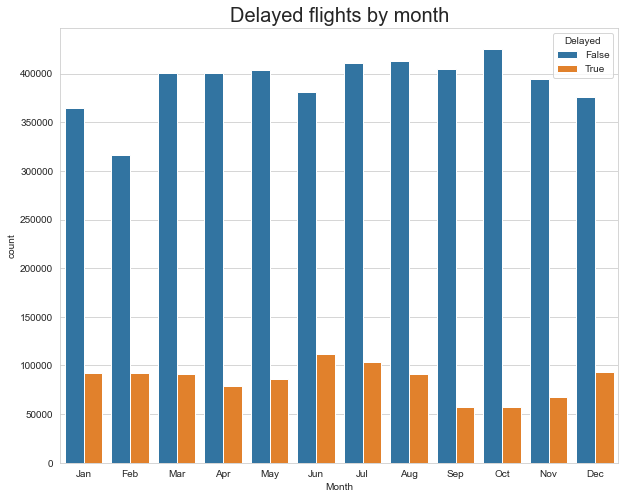

In [121]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(x='Month', hue='Delayed', data=df)

plt.title('Delayed flights by month', fontsize=20)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

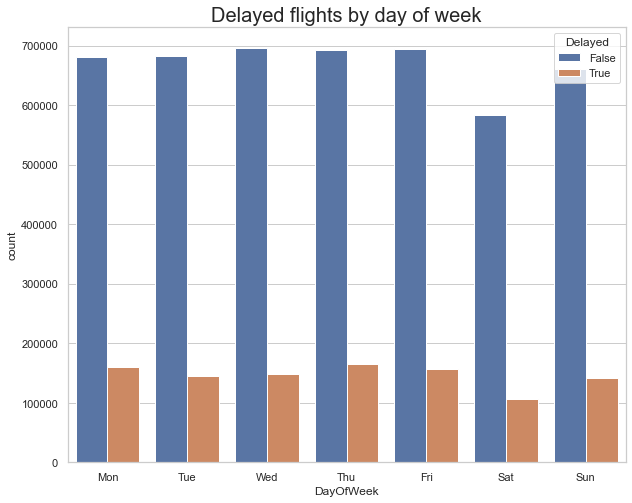

In [100]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(x='DayOfWeek', hue='Delayed', data=df)

plt.title('Delayed flights by day of week', fontsize=20)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [33]:
delayed_by_airline = df.groupby('AirlineName').agg({'Delayed': 'sum', 'AirlineName': 'count'})
delayed_by_airline['NotDelayed'] = delayed_by_airline['AirlineName'] - delayed_by_airline['Delayed']
delayed_by_airline.columns = ['Delayed', 'Total', 'NotDelayed']
delayed_by_airline['DelayedPercent'] = delayed_by_airline['Delayed'] / delayed_by_airline['Total']

delayed_by_airline.sort_values(by='DelayedPercent', ascending=False)

,Delayed,Total,NotDelayed,DelayedPercent
AirlineName,,,,
Spirit Air Lines,33166,115193,82027,0.287917
Frontier Airlines Inc.,22851,90090,67239,0.253646
JetBlue Airways,57257,262042,204785,0.218503
American Eagle Airlines Inc.,58623,278791,220168,0.210276
United Air Lines Inc.,101303,507762,406459,0.199509
Atlantic Southeast Airlines,105331,554752,449421,0.189870
Virgin America,11348,61248,49900,0.185280
Southwest Airlines Co.,227317,1242403,1015086,0.182966
Skywest Airlines Inc.,103850,576814,472964,0.180041


In [122]:
fig = px.bar(
    delayed_by_airline.sort_values(by='DelayedPercent', ascending=True),
    x=delayed_by_airline.sort_values(by='DelayedPercent', ascending=True).index,
    y='DelayedPercent',
    title='<b>Delayed Flights By Airline</b>',
    labels={'x': 'Airline', 'y': 'Delayed Percentage'},
    width=800,
    height=600,
    color='DelayedPercent',
    color_continuous_scale=px.colors.diverging.Tealrose,
    template='plotly_white',
)

fig.add_hline(y=delayed_by_airline['DelayedPercent'].mean(), line_width=1, line_dash='dash', line_color='black')
fig.add_annotation(
    x=0.5, 
    y=delayed_by_airline['DelayedPercent'].mean() + 0.003, 
    text=f'Average: {delayed_by_airline["DelayedPercent"].mean():.2%}', 
    textangle=0,
    xanchor='left',
    font=dict(
        family='Helvetica',
        size=12,
        color='#272b4f'
    ),
    bordercolor='black',
    borderpad=5,
    bgcolor='white',
    showarrow=True,
    arrowhead=1,
)

for index, airline in enumerate(delayed_by_airline.sort_values(by='DelayedPercent', ascending=True).index):
    if index in [0, 1, 2, 11, 12, 13]:
        fig.add_annotation(
            x=airline, 
            y=delayed_by_airline.loc[airline, 'DelayedPercent'] + 0.007, 
            text=f'{delayed_by_airline.loc[airline, "DelayedPercent"]:.2%}', 
            font=dict(
                family='Helvetica',
                size=12,
                color='#272b4f' if delayed_by_airline.loc[airline, 'DelayedPercent'] < delayed_by_airline['DelayedPercent'].mean() else '#ff5252'
            ),
            showarrow=False,
        )

fig.update_layout(
    title=dict(
        text = '<b>Delayed Flights By Airline</b>',
        x=0.085,
        y=0.95,
        font=dict(
            family='Helvetica',
            size=24,
            color='#272b4f'
        ),
    ),
)

fig.show()

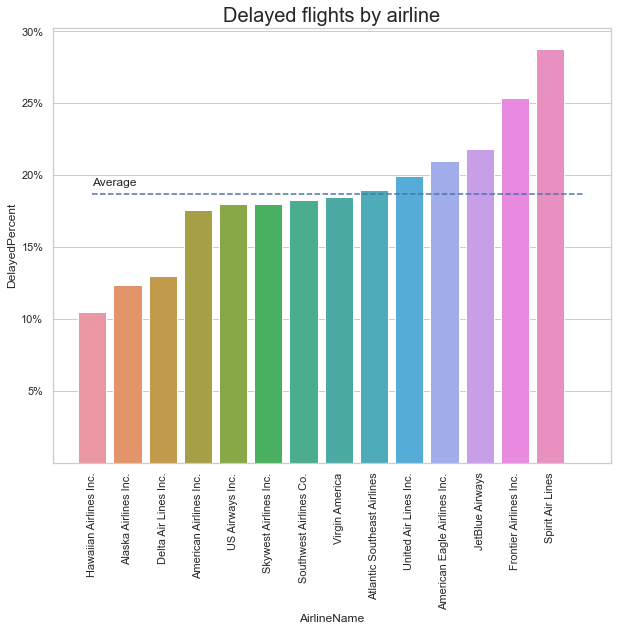

In [102]:
fig = plt.figure(figsize=(10, 8))

sns.barplot(x=delayed_by_airline.index, y='DelayedPercent', data=delayed_by_airline, order=delayed_by_airline.sort_values('DelayedPercent').index)

plt.hlines(delayed_by_airline.DelayedPercent.mean(), 0, 14, linestyles='dashed')
plt.text(0, delayed_by_airline.DelayedPercent.mean() + .005, 'Average', fontsize=12)

plt.xticks(rotation=90)
plt.yticks([.05, .1, .15, .2, .25, .3], ['5%', '10%', '15%', '20%', '25%', '30%'])

plt.title('Delayed flights by airline', fontsize=20)

plt.show()

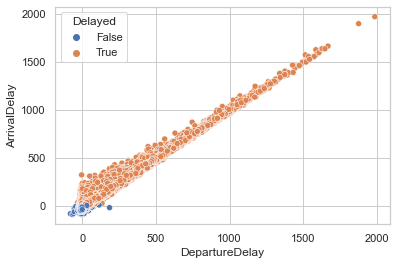

In [103]:
sns.scatterplot(x='DepartureDelay', y='ArrivalDelay', hue='Delayed', data=df)
plt.show()

In [123]:
# Awnd	Prcp	Snow
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='Awnd', y='WeatherDelay', hue='Delayed', data=df, ax=ax[0])
sns.scatterplot(x='Prcp', y='WeatherDelay', hue='Delayed', data=df, ax=ax[1])
sns.scatterplot(x='Snow', y='WeatherDelay', hue='Delayed', data=df, ax=ax[2])

plt.show()

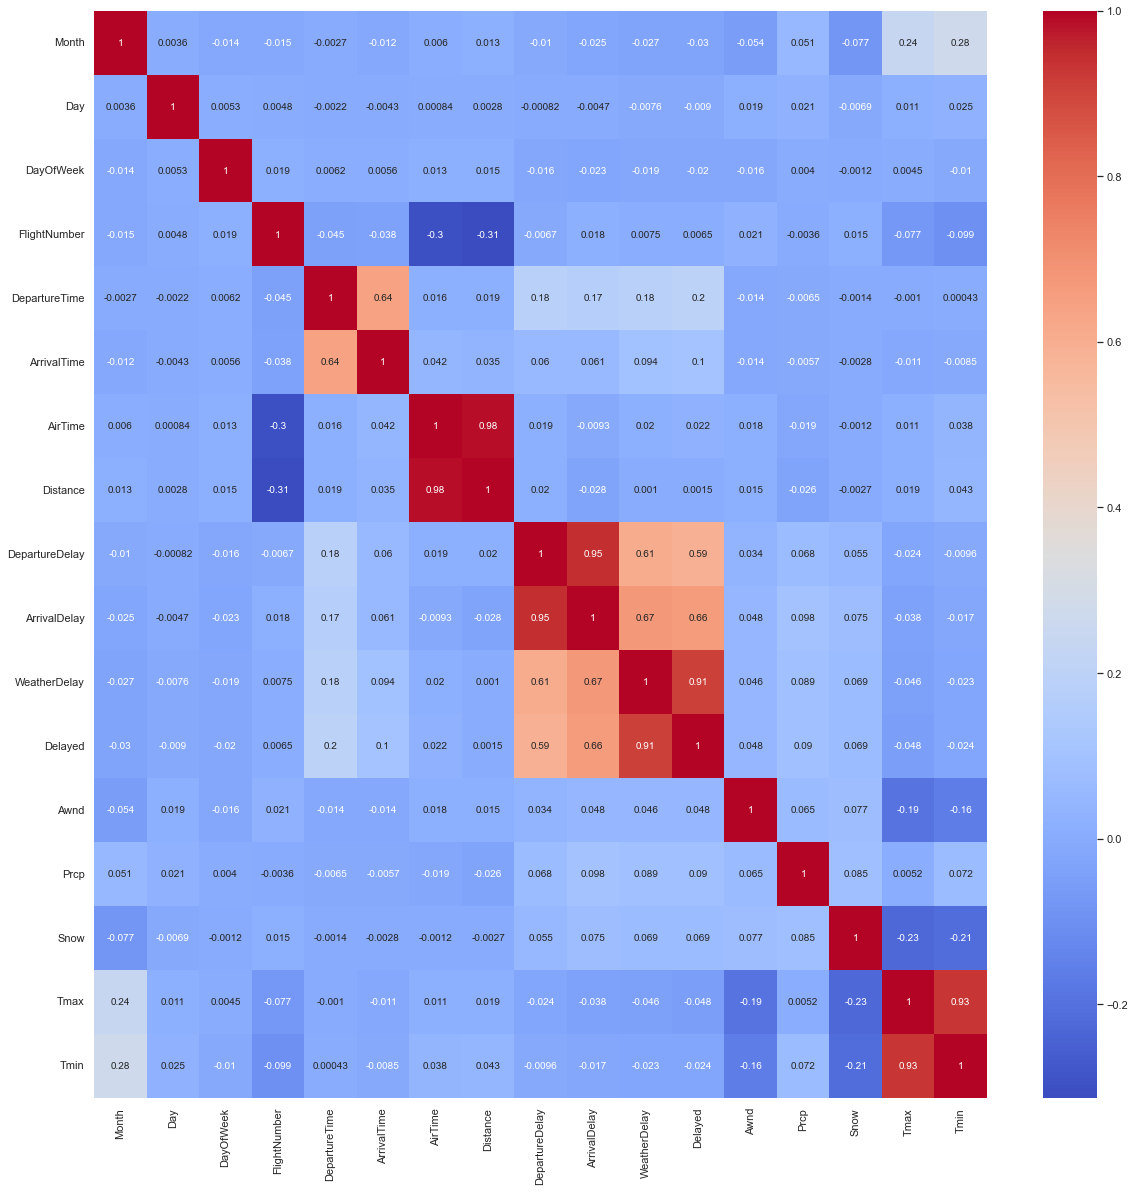

In [ ]:
fig = plt.figure(figsize=(20, 20))

sns.heatmap(df.drop(['Diverted', 'Year'], axis=1).corr(), annot=True, cmap='coolwarm')

plt.show()